# 1 Project overview

**About Dataset** </br>
A food delivery service is facing challenges in achieving profitability across its operations. With a dataset of 1,000 food orders, the service seeks to understand the dynamics of its cost structure and profitability to identify strategic opportunities for improvement.</br>

The dataset contains comprehensive details on food orders, including Order ID, Customer ID, Restaurant ID, Order and Delivery Date and Time, Order Value, Delivery Fee, Payment Method, Discounts and Offers, Commission Fee, Payment Processing Fee, and Refunds/Chargebacks. This data provides a foundation for analyzing the cost structure and profitability of the food delivery service.

**Objectives:**

- Cost Analysis
- Profitability Evaluation
- Restaurants Analysis

# 2 Preparation

## 2.1 Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 Reading dataset

In [75]:
df = pd.read_csv(r"D:\Projects\Data science\Food delivery company\food_orders_new_delhi.csv")

# 3 Initial screening

In [7]:
df.shape

(1000, 12)

In [22]:
df.head(4)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [10]:
df.columns

Index(['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time',
       'Delivery Date and Time', 'Order Value', 'Delivery Fee',
       'Payment Method', 'Discounts and Offers', 'Commission Fee',
       'Payment Processing Fee', 'Refunds/Chargebacks'],
      dtype='object')

# 4 Data cleaning

## 4.1 Missing values

In [64]:
df.isnull().sum()

Order ID                         0
Customer ID                      0
Restaurant ID                    0
Order Date and Time              0
Delivery Date and Time           0
Order Value                      0
Delivery Fee                     0
Payment Method                   0
Discounts and Offers          1000
Commission Fee                   0
Payment Processing Fee           0
Refunds/Chargebacks              0
Order Value USD                  0
Payment Processing Fee USD       0
Commission Fee USD               0
Delivery Fee USD                 0
dtype: int64

## 4.2 Duplicate values

In [19]:
df.duplicated().sum()

0

## 4.3 Data transformation

### 4.3.1 Filling missing values

In [69]:
df.fillna(0)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,0,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,0,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


### 4.3.2 Currency swap

In [23]:
exchange_rate_inr_to_bhd = 0.0045  

df["Order Value"] = df["Order Value"] * exchange_rate_inr_to_bhd
df["Payment Processing Fee"] = df["Payment Processing Fee"] * exchange_rate_inr_to_bhd
df["Commission Fee"] = df["Commission Fee"] * exchange_rate_inr_to_bhd
df["Delivery Fee"] = df["Delivery Fee"] * exchange_rate_inr_to_bhd

# 5 Data types

In [76]:
def extract_numeric(par):
    if isinstance(par, str):
        numeric_str = []
        for char in par:
            if char.isnumeric():
                numeric_str.append(char)
        numeric_str = "".join(numeric_str)
        return int(numeric_str)
    else:
        return 0


df["Discounts and Offers"] = df["Discounts and Offers"].apply(extract_numeric)

0       5
1      10
2      15
3       0
4      50
       ..
995     5
996     0
997     0
998    15
999    15
Name: Discounts and Offers, Length: 1000, dtype: int64


In [82]:
df["Discount Amount"] = df.apply(lambda row: (row["Order Value"] * row["Discounts and Offers"] / 100), axis=1)

0       95.70
1       98.60
2      140.55
3        0.00
4      996.00
        ...  
995     41.25
996      0.00
997      0.00
998    212.10
999    248.55
Name: Discount Amount, Length: 1000, dtype: float64


# 6 Cost Analysis

In [79]:
df.describe()

,Order ID,Order Value,Delivery Fee,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,16.265000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,17.626272,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,5.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,10.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,15.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,50.000000,200.00000,50.000000,150.000000


## 6.1 Profit calculation

In [91]:
df["Total Cost"] = df["Delivery Fee"] + df["Payment Processing Fee"] + df["Discount Amount"]
df["Revenue"] = df["Commission Fee"]
df["Profit"] = df["Revenue"] - df["Total Costs"]

In [92]:
df["Profit"]

0        7.30
1       36.40
2      -20.55
3       69.00
4     -946.00
        ...  
995     76.75
996     18.00
997     13.00
998    -47.10
999   -115.55
Name: Profit, Length: 1000, dtype: float64

## 6.2 Total metrics

In [100]:
total_orders = df.shape[0]
total_revenue = df["Revenue"].sum()
total_cost = df["Total Cost"].sum()
total_profit = df["Profit"].sum()

print("Total Orders:",total_orders)
print("Total_Revenue:",total_revenue)
print("Total Cost:",total_cost)
print("Total Profit:",total_profit)

Total Orders: 1000
Total_Revenue: 126990
Total Cost: 232709.85
Total Profit: -105719.85


### 6.2.1 Profitability ratio

In [101]:
profit_ratio = total_profit / total_revenue
print(profit_ratio)

-0.8325053153791637


## 6.3 Cost breakdown

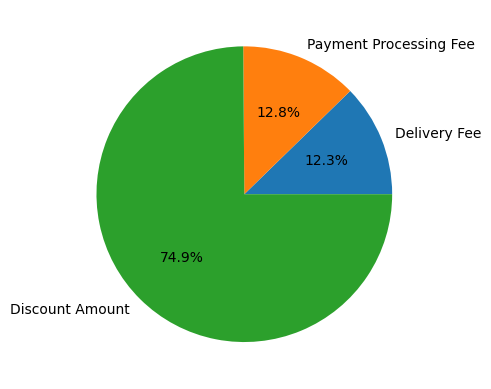

In [123]:
costs_breakdown = df[["Delivery Fee", "Payment Processing Fee", "Discount Amount"]].sum()

plot = plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%')